# Automobiles Dataset
---

In [1]:
# Importing the modules:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the dataset:
df = pd.read_csv('../../Datasets/automobiles.data')

In [3]:
# exploring the data:
df.head()
# df.tail(7)
# df.info()
# df.describe()    # Uncomment anyone of them.

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


# Data Wrangling
---

## What is the purpose of data wrangling?
Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.


## Handling missing values:
Note that the missing values are indicated with the'?' symbol

In [4]:
df.replace('?', np.nan,inplace=True)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
# changing the column names:
df.columns = headers

In [5]:
# Missing values count:
missing = df.isnull()   # This creates a nul or not boolean mask

for column in missing.columns.values:
    print(column)
    print(missing[column].value_counts())
    print('')

symboling
False    204
Name: symboling, dtype: int64

normalized-losses
False    164
True      40
Name: normalized-losses, dtype: int64

make
False    204
Name: make, dtype: int64

fuel-type
False    204
Name: fuel-type, dtype: int64

aspiration
False    204
Name: aspiration, dtype: int64

num-of-doors
False    202
True       2
Name: num-of-doors, dtype: int64

body-style
False    204
Name: body-style, dtype: int64

drive-wheels
False    204
Name: drive-wheels, dtype: int64

engine-location
False    204
Name: engine-location, dtype: int64

wheel-base
False    204
Name: wheel-base, dtype: int64

length
False    204
Name: length, dtype: int64

width
False    204
Name: width, dtype: int64

height
False    204
Name: height, dtype: int64

curb-weight
False    204
Name: curb-weight, dtype: int64

engine-type
False    204
Name: engine-type, dtype: int64

num-of-cylinders
False    204
Name: num-of-cylinders, dtype: int64

engine-size
False    204
Name: engine-size, dtype: int64

fuel-system
Fa

<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>


Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>

<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>

<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>

<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>


In [6]:
# replacing by mean:

mean1 = df['normalized-losses'].astype('float').mean()
df['normalized-losses'].replace(np.nan, mean1, inplace=True)

mean2 = df['stroke'].astype('float').mean()
df['stroke'].replace(np.nan, mean2, inplace=True)

mean3 = df['bore'].astype('float').mean()
df['bore'].replace(np.nan, mean3, inplace=True)

mean4 = df['horsepower'].astype('float').mean()
df['horsepower'].replace(np.nan, mean4, inplace=True)

mean5 = df['peak-rpm'].astype('float').mean()
df['peak-rpm'].replace(np.nan, mean5, inplace=True)    # Note that, for obvious reasons, data formatting took place.

In [7]:
# Replacing by frequency:
df['num-of-doors'].describe()

count      202
unique       2
top       four
freq       114
Name: num-of-doors, dtype: object

In [8]:
df['num-of-doors'].replace(np.nan,'four',inplace = True)

In [9]:
# Dropping rows:
df.price.dropna(inplace=True)

<h3 id="correct_data_format">Correct data format</h3>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use:

<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>


In [10]:
# Listing all the data types:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.</p> 


In [11]:
# Converting the data types to a proper format:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

<h2 id="data_standardization">Data Standardization</h2>
<p>
Data is usually collected from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)
</p>

<b>What is standardization?</b>

<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<b>Example</b>

<p>Transform mpg to L/100km:</p>
<p>In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accepts the fuel consumption with L/100km standard.</p>
<p>We will need to apply <b>data transformation</b> to transform mpg into L/100km.</p>


In [12]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500.0,19,25,15250.0,12.368421


In [13]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500.0,19,9.400000,15250.0,12.368421


<h2 id="data_normalization">Data Normalization</h2>

<b>Why normalization?</b>

<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.
</p>

<b>Example</b>

<p>To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height".</p>
<p><b>Target:</b> would like to normalize those variables so their value ranges from 0 to 1</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value)</p>


In [14]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height'] / df['height'].max()

<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the pandas method 'cut' to segment the 'horsepower' column into 3 bins.</p>


(array([55., 49., 50., 13., 23.,  8.,  4.,  0.,  1.,  1.]),
 array([ 48.,  72.,  96., 120., 144., 168., 192., 216., 240., 264., 288.]),
 <BarContainer object of 10 artists>)

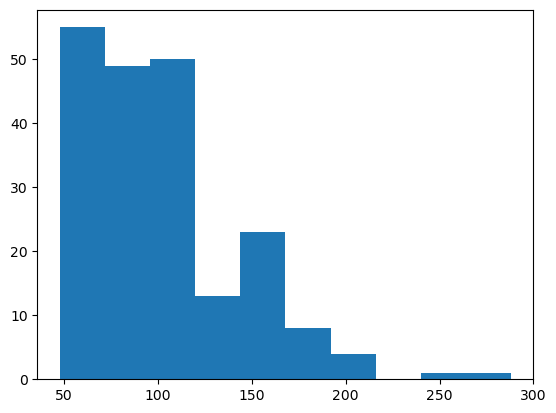

In [15]:
df['horsepower'] = df['horsepower'].astype('int')
plt.hist(df['horsepower'])

<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of horsepower, we want to set start_value = min(df["horsepower"]).</p>
<p>Since we want to include the maximum value of horsepower, we want to set end_value = max(df["horsepower"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.</p>


In [16]:
bins = np.linspace(df.horsepower.min(), df.horsepower.max(),4)
bins

array([ 48., 128., 208., 288.])

In [17]:
df['horsepower-binned'] = pd.cut(df.horsepower, bins, labels=['low','medium','high'])
df[['horsepower-binned','horsepower']].head(10)

,horsepower-binned,horsepower
0,low,111
1,medium,154
2,low,102
3,low,115
4,low,110
5,low,110
6,low,110
7,medium,140
8,medium,160
9,low,101


Text(0.5, 1.0, 'horsepower bins')

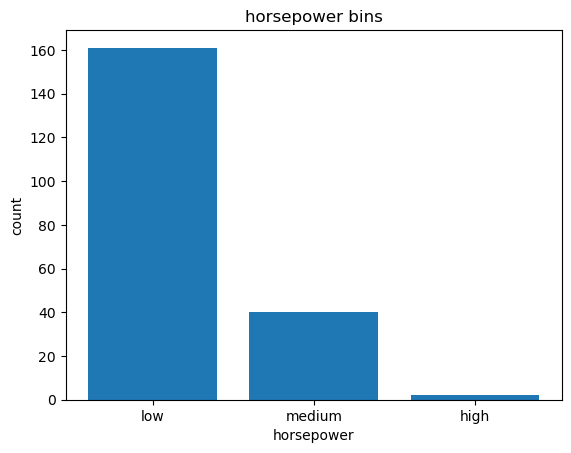

In [18]:
plt.bar(['low','medium','high'], df['horsepower-binned'].value_counts())
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

<h3>Bins Visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above. 


(array([162.,  40.,   2.]),
 array([ 48., 128., 208., 288.]),
 <BarContainer object of 3 artists>)

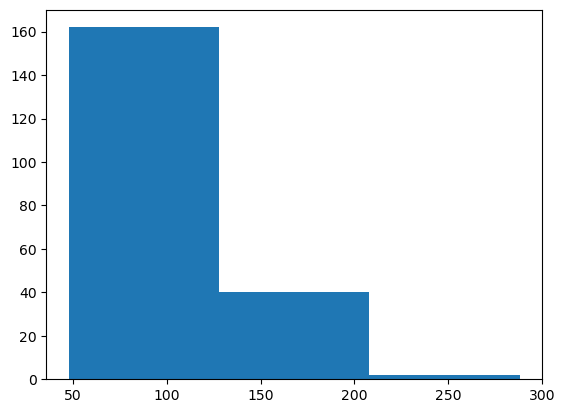

In [19]:
plt.hist(df['horsepower'], bins=3)

<h2 id="indicator">Indicator Variable (or Dummy Variable)</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>

<p>
    We use indicator variables so we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    We see the column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" to indicator variables.
</p>

<p>
    We will use pandas' method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>


In [20]:
dummy = pd.get_dummies(df['fuel-type'])
dummy.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [21]:
dummy.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)

In [22]:
# Merging the dataframes:
df = pd.concat([df,dummy],axis = 1)
# drop original column "fuel-type" from "df"
df.drop('fuel-type', axis= 1, inplace=True)

In [23]:
# Doing the same with the column Aspiration:
dummy_aspiration = pd.get_dummies(df.aspiration)
dummy_aspiration.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
pd.concat([df,dummy_aspiration], axis=1)
df.drop('aspiration',axis = 1,inplace=True)

Now that we have finished cleaning the data, lets save it into a new csv file:

In [25]:
df.to_csv('clean.csv')